# 5. Case Study: Hacker Statistics

## 주사위 던지기 게임

1. 주사위를 총 100번 던짐
2. 1이나 2가 나오면 한 계단 내려감
3. 3,4,5가 나오면 한 계단 올라감
4. 6이 나오면 주사위를 한 번 더 던져 나오는 결과만큼 올라감

### <주의사항>

1. 계단 0 밑으로는 내려갈 수 없음
2. 계단에서 떨어지면 0에서부터 다시 시작 (떨어질 확률: 0.1%)

### Q. 60번째 계단에 올라갈 수 있을지에 대한 내기를 진행할 경우, 이 내기에서 내가 이길 확률은?

### <사용할 개념>

1. Random generators: 주사위의 경우의 수는 random하게 발생
2. Random walk: 주어진 공간에서 매 순간 랜덤으로, 즉 확률적으로 이동하는 모습을 수학적으로 표현한 것
3. Distribution: 히스토그램을 통해 분포를 확인

### 1. Determine your next move

In [35]:
import numpy as np

np.random.seed(123)   # np의 random.seed() 함수를 사용해 랜덤으로 지정된 확률변수 값을 동일하게 생성할 수 있도록 사용

In [36]:
step = 50                     # 임의의 시작점 정의
dice=np.random.randint(1,7)   # 주사위의 눈은 1부터 6까지의 정수 중 랜덤하게 발생

In [37]:
if dice <= 2 :
    step = step - 1                        # 1, 2가 나오면 1계단 아래로 이동
elif dice < 6 :
    step = step + 1                        # 3, 4, 5가 나오면 1계단 위로 이동
else :
    step = step + np.random.randint(1,7)   # 6이 나오면 주사위를 한 번 더 던져서 나온 수만큼 위로 이동

In [38]:
print(dice,step)

6 53


### 2. Random walk 생성

In [39]:
random_walk=[0]   # random walk를 기록할 list를 생성하고 임의의 초기값 0을 집어넣음

In [40]:
for x in range(100) :
    step=random_walk[-1]          # append 함수를 사용할 것이기 때문에 최신화된 step은 random_walk의 마지막 원소가 됨.
    
    dice = np.random.randint(1,7)
    
    if dice <= 2 :
        step = max(0, step - 1)   # max 함수를 사용해 0 밑으로 가는 경우가 없도록 설정                        
    elif dice < 6 :
        step = step + 1                        
    else :
        step = step + np.random.randint(1,7)
    random_walk.append(step)      # append 함수를 사용해 step을 기록하는 list를 생성

In [41]:
print(random_walk)

[0, 1, 2, 1, 2, 3, 4, 3, 2, 1, 0, 0, 0, 0, 0, 1, 6, 5, 4, 5, 4, 5, 6, 7, 8, 9, 8, 9, 8, 9, 10, 11, 12, 11, 15, 16, 15, 16, 15, 16, 17, 18, 19, 20, 21, 22, 25, 26, 27, 28, 33, 34, 38, 39, 38, 39, 40, 39, 40, 41, 43, 44, 45, 44, 43, 44, 45, 44, 43, 44, 45, 47, 46, 45, 46, 45, 46, 47, 48, 50, 49, 50, 51, 52, 53, 54, 53, 52, 53, 52, 53, 54, 53, 56, 57, 58, 59, 58, 59, 60, 64]


### 3. Visualize the Random walk

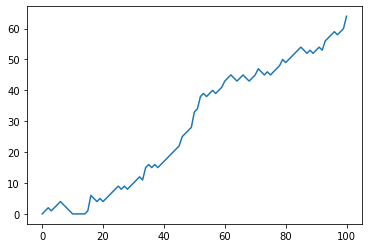

In [42]:
import matplotlib.pyplot as plt

plt.plot(random_walk)
plt.show()

### 4. Repeatedly simulate the random walk

- 1번의 random walk만을 가지고는 내가 내기에 이길 확률을 구할 수 없음
- 사건의 반복을 통해 확률을 구해줌 (경험적 확률)

In [43]:
all_walks = []                    # random_walk list의 반복을 넣을 list를 생성

for i in range(10) :              # 10번 random walk(게임)를 반복
    random_walk = [0]
    
    for x in range(100) :
        step = random_walk[-1]
        dice = np.random.randint(1,7)

        if dice <= 2:
            step = max(0, step - 1)
        elif dice <= 5:
            step = step + 1
        else:
            step = step + np.random.randint(1,7)
        
        random_walk.append(step)
        
    all_walks.append(random_walk)   # append를 사용해 random_walk를 all_walk에 넣어줌

In [44]:
print(all_walks)   # 10번의 게임의 결과를 보여줌

[[0, 0, 0, 2, 1, 2, 4, 5, 6, 11, 10, 11, 12, 13, 14, 15, 14, 19, 20, 21, 22, 21, 20, 19, 18, 17, 18, 19, 20, 26, 25, 24, 23, 24, 25, 26, 25, 26, 27, 26, 31, 32, 31, 30, 29, 28, 29, 28, 27, 29, 30, 33, 34, 36, 37, 38, 39, 38, 37, 38, 39, 40, 41, 40, 41, 42, 43, 46, 47, 48, 47, 48, 47, 48, 49, 50, 54, 53, 52, 53, 54, 55, 54, 55, 54, 55, 57, 62, 61, 62, 63, 64, 65, 66, 67, 66, 67, 68, 69, 71, 73], [0, 0, 1, 2, 5, 4, 5, 4, 5, 6, 7, 6, 7, 6, 7, 8, 10, 9, 8, 9, 10, 9, 11, 12, 13, 14, 15, 16, 17, 16, 17, 18, 23, 24, 23, 22, 21, 20, 21, 22, 23, 28, 29, 28, 29, 30, 31, 32, 33, 34, 33, 32, 33, 32, 38, 37, 38, 37, 38, 37, 38, 42, 46, 48, 50, 49, 50, 52, 51, 57, 58, 60, 61, 60, 61, 62, 63, 62, 63, 64, 65, 67, 66, 65, 66, 72, 77, 76, 75, 79, 80, 81, 82, 84, 83, 84, 83, 84, 83, 82, 88], [0, 0, 1, 2, 3, 4, 5, 6, 7, 8, 7, 8, 7, 6, 7, 6, 7, 6, 7, 8, 12, 13, 12, 18, 17, 16, 17, 16, 15, 16, 15, 19, 18, 19, 18, 19, 18, 19, 21, 20, 19, 18, 19, 18, 23, 24, 25, 24, 23, 24, 23, 24, 23, 28, 29, 28, 27, 26, 25,

### 5. Visualize all walks

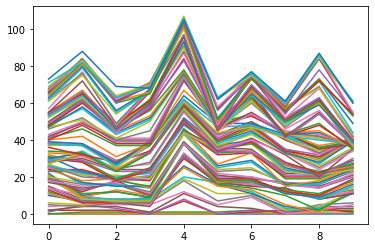

In [47]:
np_aw=np.array(all_walks)   # all_walks list를 np의 array 형태로 변환 (다루기 쉬워짐)
plt.plot(np_aw); plt.show()

In [48]:
plt.clf()   # Clear the figure

<Figure size 432x288 with 0 Axes>

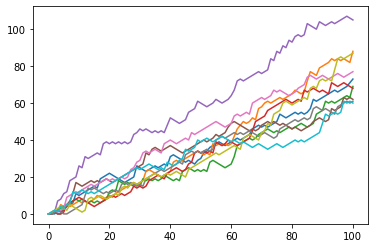

In [49]:
np_aw_t=np.transpose(np_aw)   # array를 transpose시킨 후 plot
plt.plot(np_aw_t); plt.show()

In [50]:
print(np_aw)
print(np_aw_t)   # row: x축. observation: y축

[[ 0  0  0 ... 69 71 73]
 [ 0  0  1 ... 83 82 88]
 [ 0  0  1 ... 64 63 69]
 ...
 [ 0  0  1 ... 61 60 61]
 [ 0  1  2 ... 85 86 87]
 [ 0  1  2 ... 60 61 60]]
[[ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  1  1]
 [ 0  1  1 ...  1  2  2]
 ...
 [69 83 64 ... 61 85 60]
 [71 82 63 ... 60 86 61]
 [73 88 69 ... 61 87 60]]


### 6. Implement clumsiness

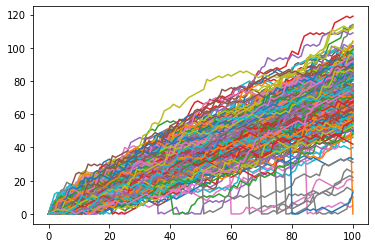

In [51]:
all_walks = []

for i in range(250) :                  # 게임을 250번 시행
    random_walk = [0]
    
    for x in range(100) :
        step = random_walk[-1]
        dice = np.random.randint(1,7)
        
        if dice <= 2:
            step = max(0, step - 1)
        elif dice <= 5:
            step = step + 1
        else:
            step = step + np.random.randint(1,7)

        if np.random.rand() < 0.001 :   # 임의로 생성한 실수가 0.001보다 작다면 step=0으로 초기화
            step = 0

        random_walk.append(step)
    
    all_walks.append(random_walk)

np_aw_t = np.transpose(np.array(all_walks))
plt.plot(np_aw_t)
plt.show()

### 7. Plot the distribution

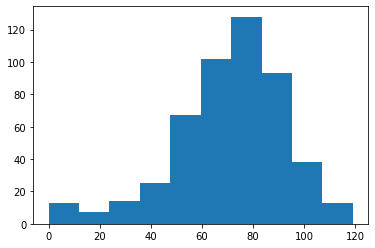

In [52]:
all_walks = []

for i in range(500) :                  # 게임을 500번 시행
    random_walk = [0]
    
    for x in range(100) :
        step = random_walk[-1]
        dice = np.random.randint(1,7)
        
        if dice <= 2:
            step = max(0, step - 1)
        elif dice <= 5:
            step = step + 1
        else:
            step = step + np.random.randint(1,7)

        if np.random.rand() < 0.001 :   # 임의로 생성한 실수가 0.001보다 작다면 step=0으로 초기화
            step = 0

        random_walk.append(step)
    
    all_walks.append(random_walk)

np_aw_t = np.transpose(np.array(all_walks))

ends = np_aw_t[-1,:]                    # np_aw_t의 마지막 행(최종 step 값)을 ends로 지정

plt.hist(ends)                          # ends의 히스토그램을 그려줌
plt.show()

In [53]:
np.mean(ends > 60)   # ends 값이 60보다 큰 경우의 수를 전체 경우의 수로 나눠주는 mean 함수를 이용

0.734

### 약 73.4 %의 확률로 60 step에 도달할 수 있음